# Introduction to the Dataset


### Dataset Selection and Motivation
#### The dataset chosen for this project focuses on employee salaries and their relationships with various attributes such as job title, experience level, education, and demographics. The motivation behind selecting this dataset is to analyze how different factors influence salaries and whether machine learning models can accurately predict salaries and classify employees into salary categories.


### Research Questions
#### Regression Task: How can employee salaries be predicted based on job roles, experience levels, and demographic attributes?

### Dataset Overview
#### The dataset contains 375 records with the following columns:

##### Age (Numerical) – Employee’s age.
##### Gender (Categorical) – Male or Female.
##### Education Level (Categorical) – Bachelor's, Master's, or PhD.
##### Job Title (Categorical) – Various job roles.
##### Years of Experience (Numerical) – Total work experience in years.
##### Salary (Numerical) – Employee’s annual salary.

### 1. Exploratory Data Analysis (EDA)


### 1.1 Importing the libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 

### Loading the Dataset

In [86]:
import pandas as pd  
df = pd.read_csv("Salary Data.csv")
df.head()

Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0

### Display basic info


In [88]:
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


None

Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0

### Handle missing values (option: drop or fill)

In [90]:
# Fill missing numerical values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill missing categorical values with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df.update(df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0])))

display(df.isnull().sum())

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

### Encoding for categorical variables

In [92]:
label_encoders = {}
for col in ['Gender', 'Education Level', 'Job Title']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

display(df.head())


Age  Gender  Education Level  Job Title  Years of Experience    Salary
0  32.0       1                0        159                  5.0   90000.0
1  28.0       0                1         17                  3.0   65000.0
2  45.0       1                2        130                 15.0  150000.0
3  36.0       0                0        101                  7.0   60000.0
4  52.0       1                1         22                 20.0  200000.0

### Feature Scaling

In [94]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select numeric columns excluding the target variable
numeric_cols = df.select_dtypes(include=['number']).columns.drop('Salary')

# Apply scaling
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Display the updated dataframe
display(df.head())


Age  Gender  Education Level  Job Title  Years of Experience    Salary
0  0.300000     1.0              0.0   0.919075                 0.20   90000.0
1  0.166667     0.0              0.5   0.098266                 0.12   65000.0
2  0.733333     1.0              1.0   0.751445                 0.60  150000.0
3  0.433333     0.0              0.0   0.583815                 0.28   60000.0
4  0.966667     1.0              0.5   0.127168                 0.80  200000.0

### Exploratory Data Analysis (EDA)

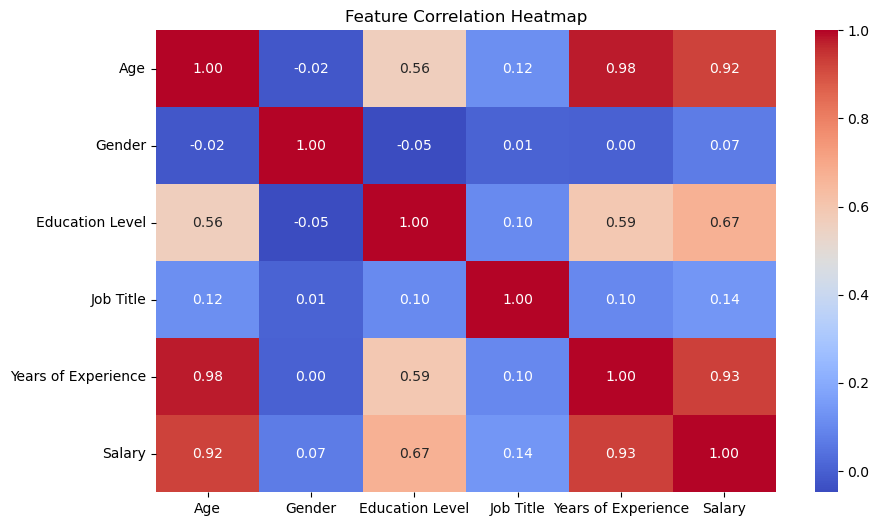

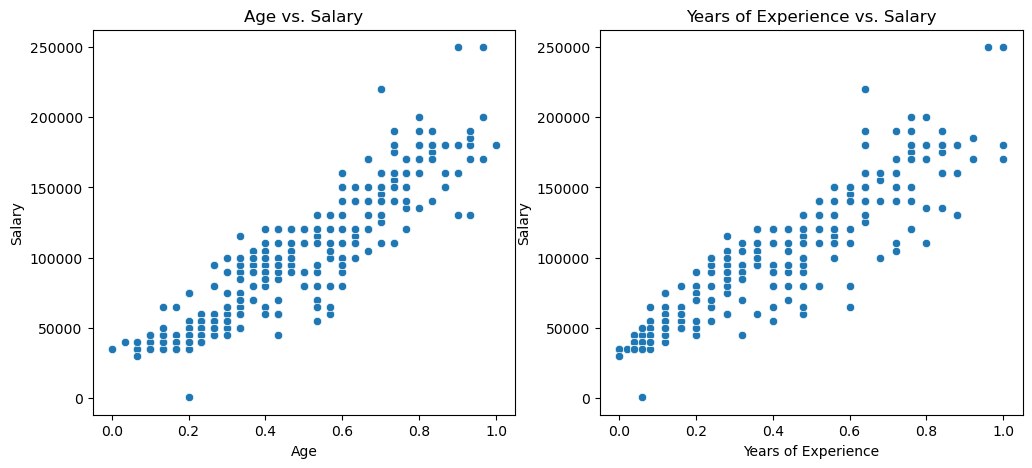

In [96]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x=df['Age'], y=df['Salary'], ax=axes[0])
axes[0].set_title("Age vs. Salary")
sns.scatterplot(x=df['Years of Experience'], y=df['Salary'], ax=axes[1])
axes[1].set_title("Years of Experience vs. Salary")
plt.show()


### Train and Evaluate Models

In [98]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Salary'])
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_r2 = r2_score(y_test, y_pred)
print(f"Linear Regression - MSE: {lin_mse}, R2: {lin_r2}")

Linear Regression - MSE: 247039256.03642178, R2: 0.8980457375708112


### Train Linear Regression Model

In [100]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_r2 = r2_score(y_test, y_pred)
print(f"Linear Regression - MSE: {lin_mse}, R2: {lin_r2}")


Linear Regression - MSE: 247039256.03642178, R2: 0.8980457375708112


### Train Decision Tree Model and Random Forest Models

In [102]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_tree_pred = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, y_tree_pred)
tree_r2 = r2_score(y_test, y_tree_pred)
print(f"Decision Tree - MSE: {tree_mse}, R2: {tree_r2}")

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_rf_pred = rf_reg.predict(X_test)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)
print(f"Random Forest - MSE: {rf_mse}, R2: {rf_r2}")

Decision Tree - MSE: 235000000.0, R2: 0.9030143951399894
Random Forest - MSE: 180085909.70963332, R2: 0.9256776983831743


### Hyperparameter Tuning

In [104]:
param_grid = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
print("Best Decision Tree Params:", grid_search.best_params_)


Best Decision Tree Params: {'max_depth': None, 'min_samples_split': 10}


### Feature Selection

In [106]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
display(feature_df)

Feature  Importance
0                  Age    0.729065
4  Years of Experience    0.187984
3            Job Title    0.048491
2      Education Level    0.031147
1               Gender    0.003313

### Final Model Training

In [108]:
best_model = DecisionTreeRegressor(**grid_search.best_params_, random_state=42)
best_model.fit(X_train, y_train)
y_final_pred = best_model.predict(X_test)
final_mse = mean_squared_error(y_test, y_final_pred)
final_r2 = r2_score(y_test, y_final_pred)
print(f"Final Model - MSE: {final_mse}, R2: {final_r2}")


Final Model - MSE: 178090584.32014784, R2: 0.926501178552501


### Conclusion

In [110]:
print("\nModel Comparison:")
print(f"Linear Regression - MSE: {lin_mse}, R2: {lin_r2}")
print(f"Decision Tree - MSE: {tree_mse}, R2: {tree_r2}")
print(f"Random Forest - MSE: {rf_mse}, R2: {rf_r2}")
print(f"Final Decision Tree Model - MSE: {final_mse}, R2: {final_r2}")



Model Comparison:
Linear Regression - MSE: 247039256.03642178, R2: 0.8980457375708112
Decision Tree - MSE: 235000000.0, R2: 0.9030143951399894
Random Forest - MSE: 180085909.70963332, R2: 0.9256776983831743
Final Decision Tree Model - MSE: 178090584.32014784, R2: 0.926501178552501
